In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import time 
import numpy as np

from sklearn.inspection import permutation_importance

In [2]:
# loading data
file_to_load = "../Resources/full_titanic.csv"


no_touchy = pd.read_csv(file_to_load)
full_data = no_touchy
full_data.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imp_median,Age_imp_mean
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0


In [3]:
full_data['Sex_binary'] = [0 if x == 'male' else 1 for x in full_data['Sex']]

full_data.head(1)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imp_median,Age_imp_mean,Sex_binary
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,22.0,22.0,0


In [8]:
# ?? Do i need this??
# X, y = make_classification(
#     n_samples=1000, n_features=10, n_informative=3, n_redundant=0,
#     n_repeated=0, n_classes=2, random_state=0, shuffle=False)


# defining the dependent and independent variables 
Xtrain = full_data[['SibSp','Parch','Fare','Age_imp_median','Sex_binary']]
ytrain = full_data['Survived']

In [12]:
feature_names = [f'feature {i}' for i in range(Xtrain.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# feature importance based on mean decrease in impurity 

In [14]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.021 seconds


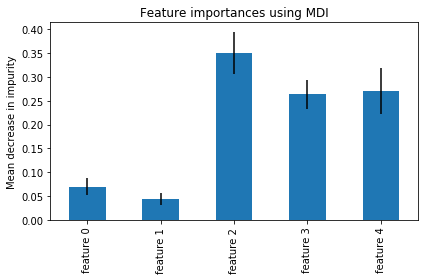

In [15]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Feature importance based on feature permutation

In [18]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

NameError: name 'X_test' is not defined